In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
display(df.isnull().sum())

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [3]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
display(df_encoded.head())

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,140,203,155,3.1,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,138,294,106,1.9,0,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [4]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (768, 22)
X_test shape: (257, 22)
y_train shape: (768,)
y_test shape: (257,)


In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

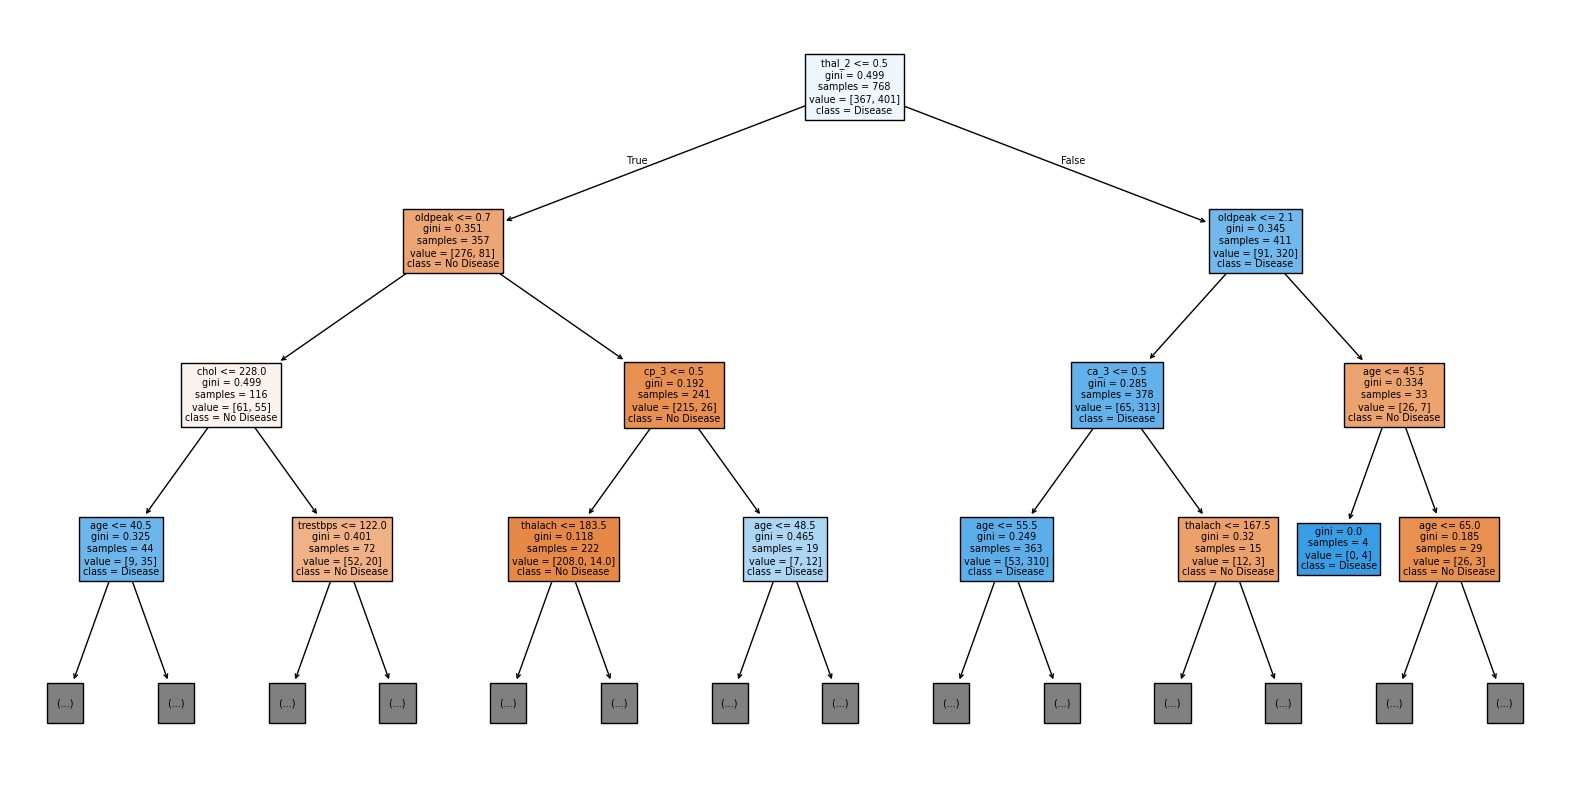

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['No Disease', 'Disease'], filled=True, max_depth=3)
plt.show()

In [7]:
from sklearn.metrics import accuracy_score

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.9650


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depths = [2, 3, 5, 10]

for depth in depths:
    dt_model_tuned = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model_tuned.fit(X_train, y_train)

    y_train_pred_tuned = dt_model_tuned.predict(X_train)
    y_test_pred_tuned = dt_model_tuned.predict(X_test)

    train_accuracy_tuned = accuracy_score(y_train, y_train_pred_tuned)
    test_accuracy_tuned = accuracy_score(y_test, y_test_pred_tuned)

    print(f"Max Depth: {depth}")
    print(f"  Training Accuracy: {train_accuracy_tuned:.4f}")
    print(f"  Testing Accuracy: {test_accuracy_tuned:.4f}")

Max Depth: 2
  Training Accuracy: 0.8008
  Testing Accuracy: 0.7237
Max Depth: 3
  Training Accuracy: 0.8581
  Testing Accuracy: 0.7899
Max Depth: 5
  Training Accuracy: 0.9089
  Testing Accuracy: 0.8405
Max Depth: 10
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9650


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
from sklearn.metrics import accuracy_score

y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Test Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Test Accuracy: {accuracy_rf:.4f}")

Decision Tree Test Accuracy: 0.9650
Random Forest Test Accuracy: 0.9883


In [11]:
import pandas as pd

feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
display(feature_importance_df)

,feature,importance
4,oldpeak,0.123080
3,thalach,0.119488
20,thal_2,0.103306
21,thal_3,0.092112
2,chol,0.088445
0,age,0.085427
1,trestbps,0.073554
12,exang_1,0.044756
14,slope_2,0.038695
13,slope_1,0.032640


In [12]:
from sklearn.model_selection import cross_val_score

dt_cv_scores = cross_val_score(dt_model, X, y, cv=5)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)

print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Random Forest Cross-Validation Scores:", rf_cv_scores)

Decision Tree Cross-Validation Scores: [1.         1.         0.98536585 0.97073171 0.98536585]
Random Forest Cross-Validation Scores: [1.         1.         0.97073171 0.98536585 0.98536585]


## Summarize findings

### Subtask:
Summarize the findings from the analysis and model evaluations.


## Summary:

### Data Analysis Key Findings

*   The dataset did not contain any missing values.
*   Categorical features were successfully one-hot encoded.
*   The dataset was split into training (75%) and testing (25%) sets.
*   The initial Decision Tree model (without depth control) showed perfect training accuracy (1.0000) but slightly lower testing accuracy (0.9650), indicating potential overfitting.
*   Experimenting with Decision Tree depths showed that a `max_depth` of 5 provided a better balance between training (0.9089) and testing (0.8405) accuracy compared to the default depth.
*   The Random Forest model achieved a higher test accuracy (0.9883) compared to the initial Decision Tree model (0.9650).
*   Cross-validation scores also indicated strong performance for both models, with the Random Forest showing slightly more consistent high scores across folds compared to the default Decision Tree.
*   Feature importance analysis from the Random Forest model identified 'oldpeak', 'thalach', and the one-hot encoded 'thal' features ('thal\_2' and 'thal\_3') as the most important predictors.

### Insights or Next Steps

*   The Random Forest classifier appears to be a more robust model for this dataset, likely due to its ensemble nature which reduces overfitting compared to a single, deep Decision Tree.
*   Further hyperparameter tuning for both models, especially the Random Forest (e.g., `n_estimators`, `max_features`), could potentially improve performance and generalization.
